In [2]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import *
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns',None)


In [4]:
df1=pd.read_csv("/content/kidney_disease - kidney_disease.csv")
df2=pd.read_csv("/content/indian_liver_patient - indian_liver_patient.csv")
df3=pd.read_csv("/content/parkinsons - parkinsons.csv")
df1.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
df1['classification'].value_counts()

,count
classification,
ckd,250
notckd,150


In [7]:
dfc1=df1.copy()
dfc1=dfc1.drop('id',axis=1)
dfc1.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
dfc1['classification'] = dfc1['classification'].astype(str).str.strip().str.lower()
dfc1['classification'] = dfc1['classification'].replace({'ckd':1, 'notckd':0})

In [9]:
dfc1.isnull().sum()

,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4
bgr,44


In [10]:
num_obj=['pcv','wc','rc']

for i in num_obj:
  dfc1[i]=pd.to_numeric(dfc1[i],errors='coerce')

dfc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             329 non-null    float64
 16  wc              294 non-null    float64
 17  rc              269 non-null    flo

In [11]:
dfc1.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,1


In [12]:
num_cols = dfc1.select_dtypes(include=['float64', 'int64']).columns
num_cols=num_cols.drop('classification')

for col in num_cols:
    dfc1[col] = dfc1[col].fillna(dfc1[col].median())


cat_cols = dfc1.select_dtypes(include=['object']).columns

for col in cat_cols:
    dfc1[col] = dfc1[col].fillna(dfc1[col].mode()[0])


In [13]:
num_cols

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc'],
      dtype='object')

In [14]:
dfc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    object 
 6   pc              400 non-null    object 
 7   pcc             400 non-null    object 
 8   ba              400 non-null    object 
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    float64
 16  wc              400 non-null    float64
 17  rc              400 non-null    flo

In [15]:
cat_cols = dfc1.select_dtypes(include=['object']).columns
cat_cols

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'], dtype='object')

In [16]:
for col in cat_cols:
    print("\nColumn:", col)
    print(dfc1[col].value_counts())



Column: rbc
rbc
normal      353
abnormal     47
Name: count, dtype: int64

Column: pc
pc
normal      324
abnormal     76
Name: count, dtype: int64

Column: pcc
pcc
notpresent    358
present        42
Name: count, dtype: int64

Column: ba
ba
notpresent    378
present        22
Name: count, dtype: int64

Column: htn
htn
no     253
yes    147
Name: count, dtype: int64

Column: dm
dm
no     263
yes    137
Name: count, dtype: int64

Column: cad
cad
no     366
yes     34
Name: count, dtype: int64

Column: appet
appet
good    318
poor     82
Name: count, dtype: int64

Column: pe
pe
no     324
yes     76
Name: count, dtype: int64

Column: ane
ane
no     340
yes     60
Name: count, dtype: int64


In [17]:
dfc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    object 
 6   pc              400 non-null    object 
 7   pcc             400 non-null    object 
 8   ba              400 non-null    object 
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    float64
 16  wc              400 non-null    float64
 17  rc              400 non-null    flo

In [18]:
x = dfc1.drop('classification', axis=1)
y = dfc1['classification']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
x_train.shape, x_test.shape


((320, 24), (80, 24))

In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OrdinalEncoder(), cat_cols)
    ]
)

In [21]:
models = {
    "Logistic Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(max_iter=2000, random_state=42))
    ]),
    "KNN": KNeighborsClassifier(),

    "Decision Tree": DecisionTreeClassifier(),

    "Random Forest": RandomForestClassifier(random_state=42),

    "Gradient Boosting": GradientBoostingClassifier()
}


In [22]:



results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('preprocess', preprocessor),
        ('model', model)
    ])
    pipe.fit(x_train, y_train)
    preds = pipe.predict(x_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc

results



{'Logistic Regression': 0.9875,
 'KNN': 0.675,
 'Decision Tree': 0.975,
 'Random Forest': 1.0,
 'Gradient Boosting': 1.0}

In [23]:
best_pipeline1 = Pipeline([
    ("preprocessor", preprocessor),
    ("model", GradientBoostingClassifier())
])


best_pipeline1.fit(x_train, y_train)
y_pred = best_pipeline1.predict(x_test)
accuracy_score(y_test, y_pred)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

[[30  0]
 [ 0 50]]


In [24]:
mae=mean_squared_error(y_test,y_pred),
rmse=root_mean_squared_error(y_test,y_pred)
print("Mean squared error is :",mae)
print("Root mean squared error is :",rmse)

Mean squared error is : (0.0,)
Root mean squared error is : 0.0


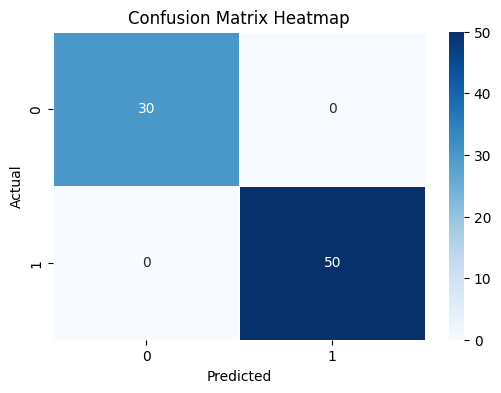

In [25]:
cm=confusion_matrix(y_test,y_pred)

# Plot heatmap

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

ROC AUC Score: 1.0


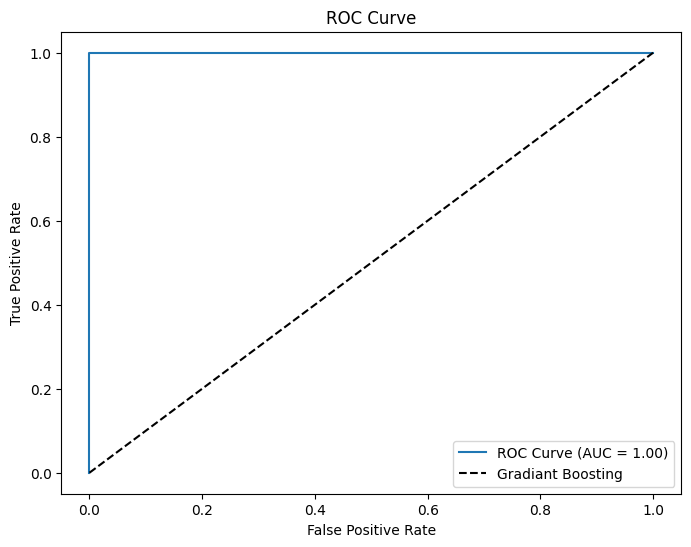

In [61]:
roc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc)

plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Gradiant Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [26]:
import joblib
joblib.dump(best_pipeline1, 'best_pipeline1.pkl')

['best_pipeline1.pkl']

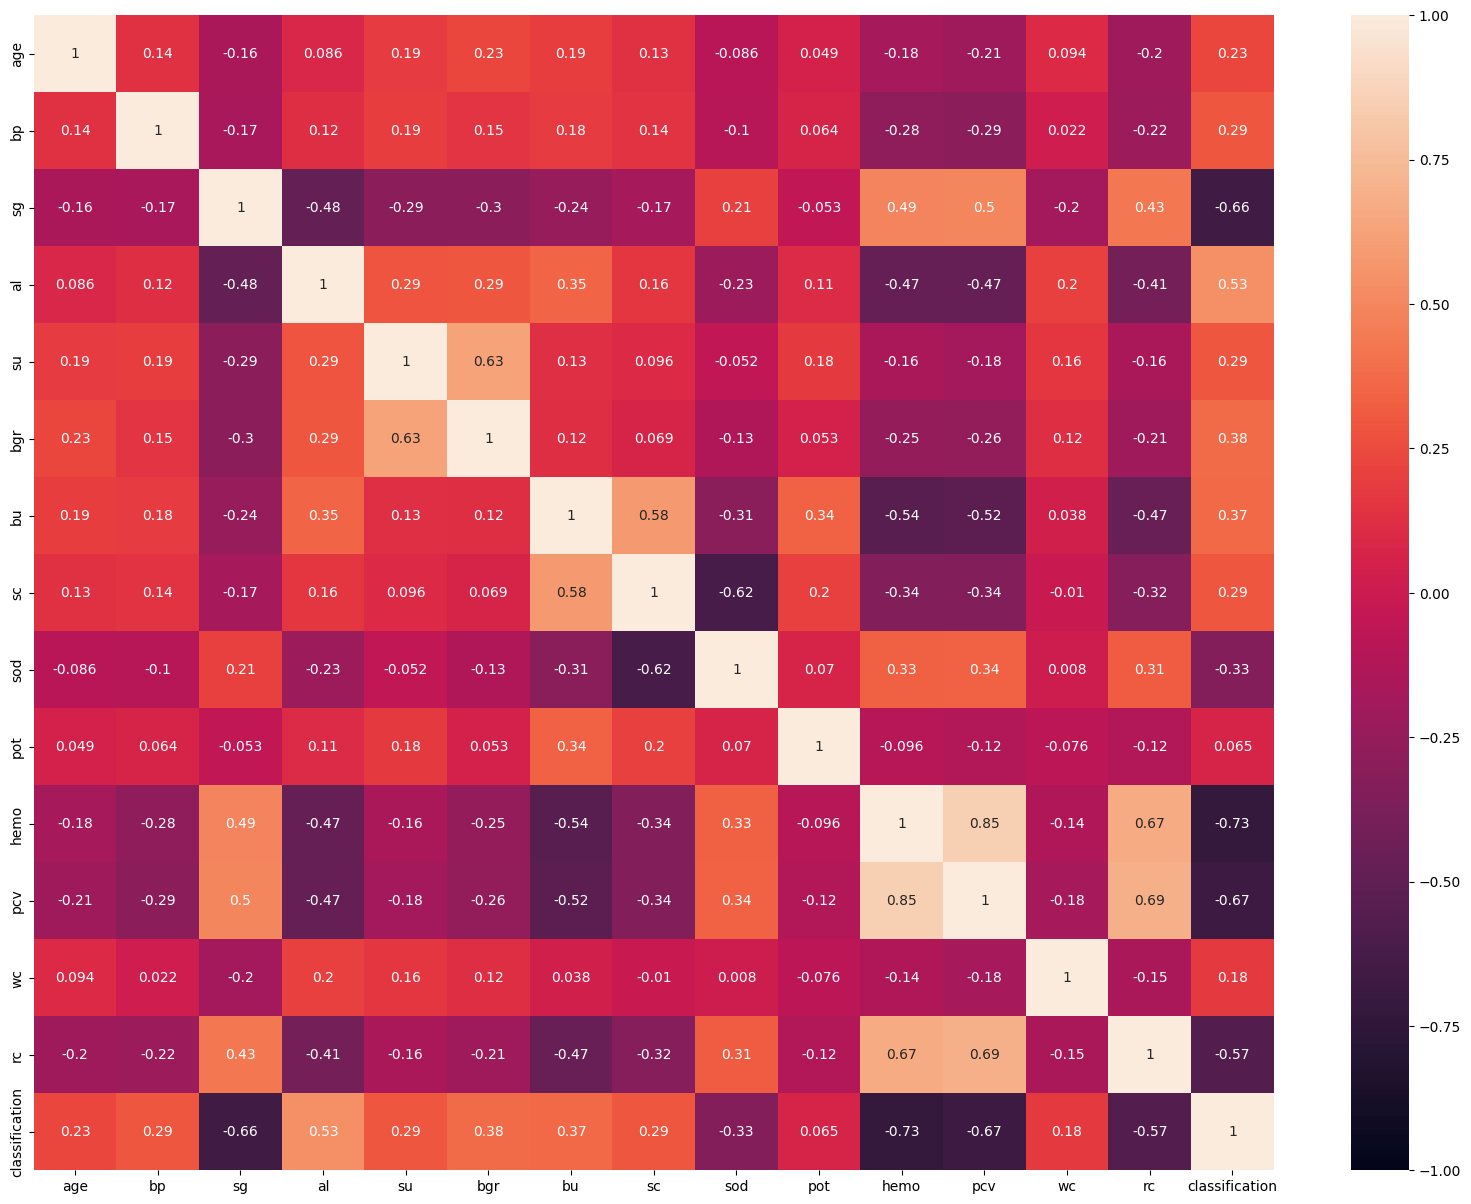

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
sns.heatmap(dfc1.corr(numeric_only=True), annot=True, vmin=-1, vmax=1)
plt.show()


In [28]:
dfc2=df2.copy()
dfc2.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [29]:
dfc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [30]:
dfc2['Albumin_and_Globulin_Ratio']=dfc2['Albumin_and_Globulin_Ratio'].fillna(dfc2['Albumin_and_Globulin_Ratio'].median())

In [31]:
dfc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [32]:
dfc2['Gender'].value_counts()

,count
Gender,
Male,441
Female,142


In [33]:
dfc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [34]:
dfc2['Dataset'].value_counts()

,count
Dataset,
1,416
2,167


In [35]:
# (1 means: Liver disease present), (2 means : No liver disease)
dfc2['Dataset'] = dfc2['Dataset'].map({1: 1, 2: 0})


In [36]:
x1 = dfc2.drop('Dataset', axis=1)
y1 = dfc2['Dataset']

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2,random_state=42,stratify=y1)

In [37]:
ord_enc1=['Gender']

num_cols1 = dfc2.select_dtypes(include=['int64', 'float64']).columns.drop('Dataset')


In [38]:
preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols1),
        ('ord', OrdinalEncoder(), ord_enc1)
    ]
)


In [39]:
models1 = {
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "SVM": SVC(random_state=42)
}


In [40]:
results1 = {}

for name, model in models1.items():

    pipe = Pipeline([
        ('preprocess', preprocessor1),
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])

    pipe.fit(x1_train, y1_train)
    preds = pipe.predict(x1_test)
    acc = accuracy_score(y1_test, preds)

    results1[name] = acc

results1


{'Logistic Regression': 0.7094017094017094,
 'KNN': 0.6068376068376068,
 'Decision Tree': 0.6495726495726496,
 'Random Forest': 0.7606837606837606,
 'Gradient Boosting': 0.7521367521367521,
 'XGBoost': 0.717948717948718,
 'SVM': 0.7350427350427351}

In [41]:
best_pipe2 = Pipeline([
    ('preprocess', preprocessor1),
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(random_state=42))
])

best_pipe2.fit(x1_train, y1_train)

best_pipe2.score(x1_test, y1_test)


0.7606837606837606

In [42]:
y1_pred = best_pipe2.predict(x1_test)

print("Test Accuracy:", accuracy_score(y1_test, y1_pred))
print(classification_report(y1_test, y1_pred))
print(confusion_matrix(y1_test, y1_pred))


Test Accuracy: 0.7606837606837606
              precision    recall  f1-score   support

           0       0.61      0.50      0.55        34
           1       0.81      0.87      0.84        83

    accuracy                           0.76       117
   macro avg       0.71      0.68      0.69       117
weighted avg       0.75      0.76      0.75       117

[[17 17]
 [11 72]]


In [43]:
mae1=mean_squared_error(y1_test,y1_pred),
rmse1=root_mean_squared_error(y1_test,y1_pred)
print("Mean squared error is : ", mae1)
print("Root mean squared error is :",rmse1)

Mean squared error is :  (0.23931623931623933,)
Root mean squared error is : 0.48919959047022854


<Axes: >

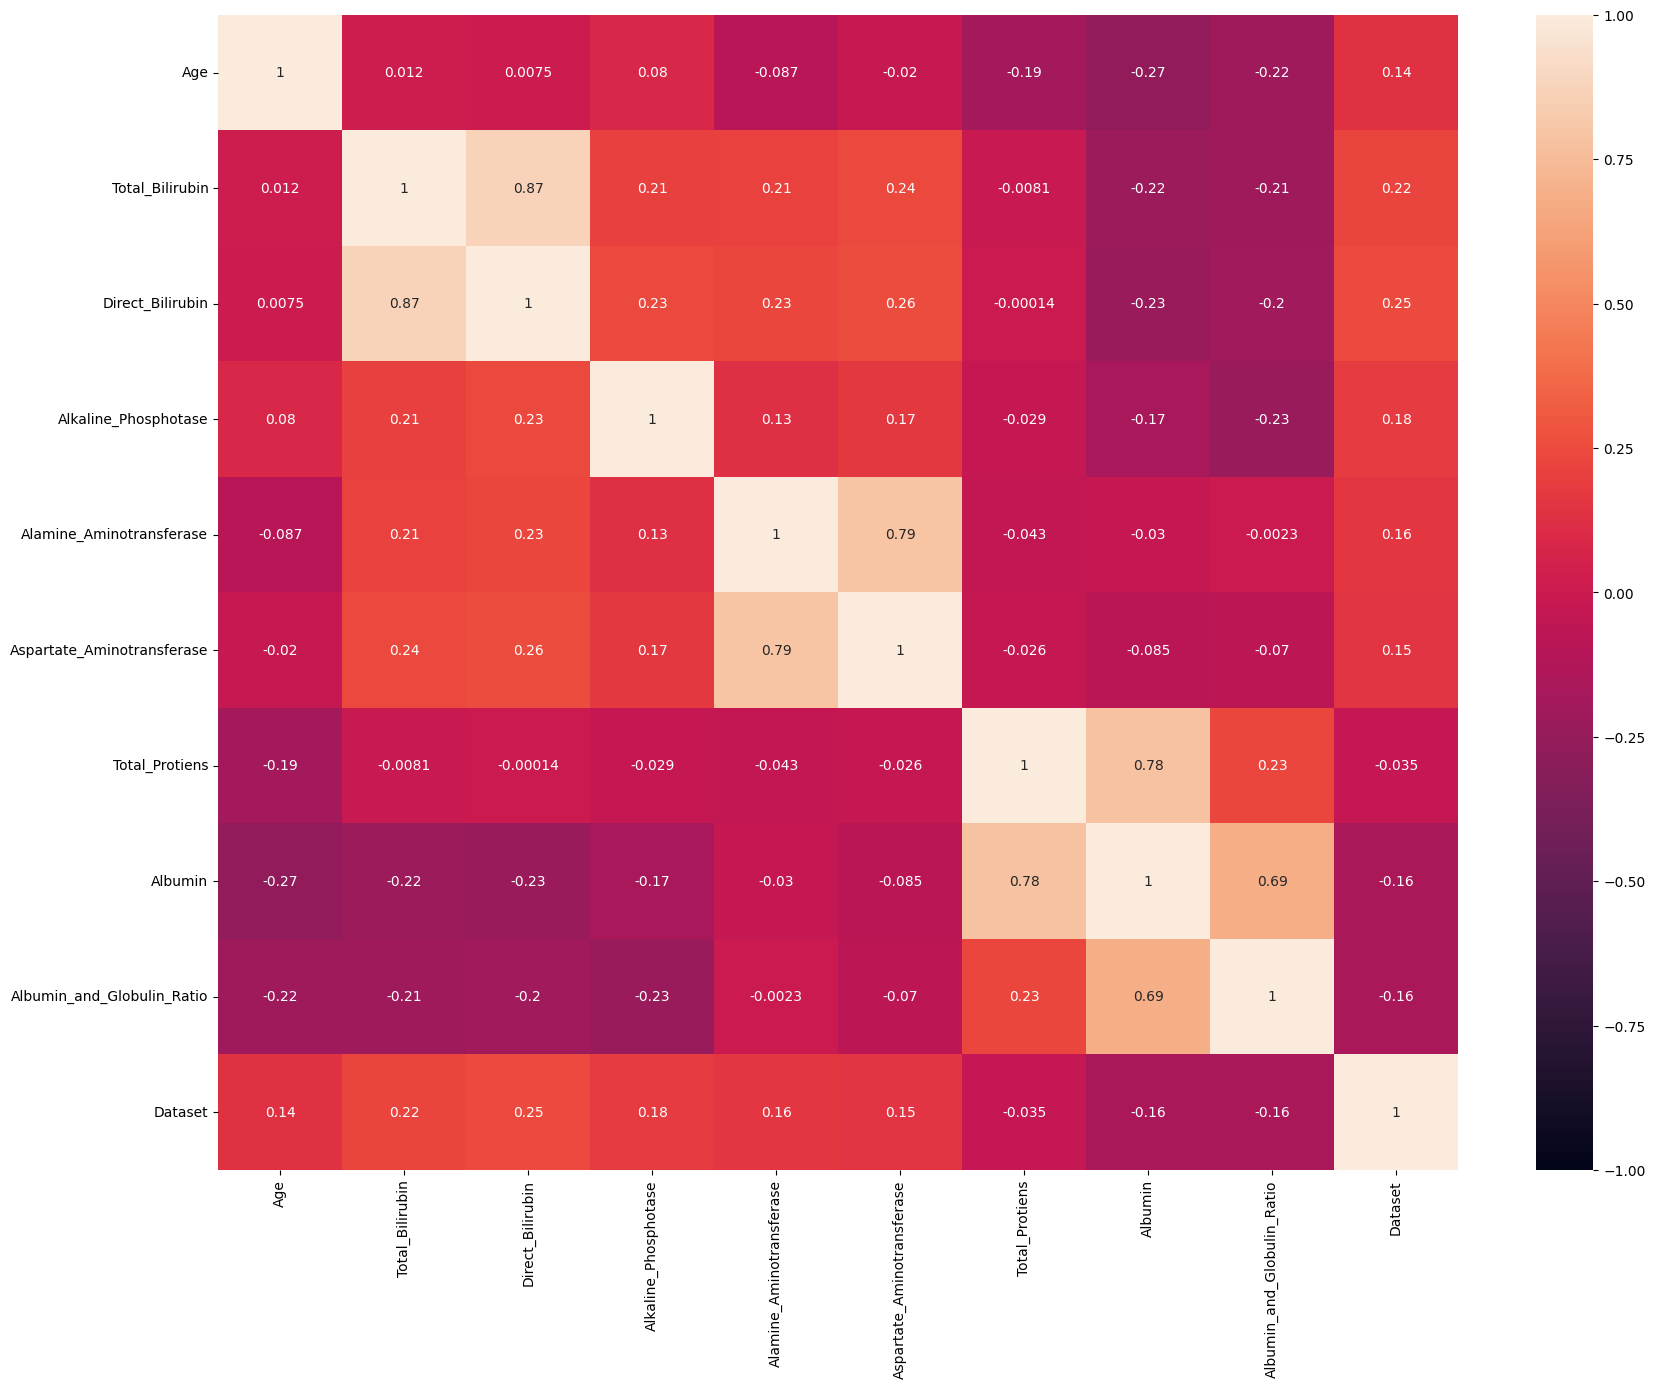

In [44]:
plt.figure(figsize=(20,15))
sns.heatmap(dfc2.corr(numeric_only=True), annot=True, vmin=-1, vmax=1)

ROC AUC Score: 0.6837349397590362


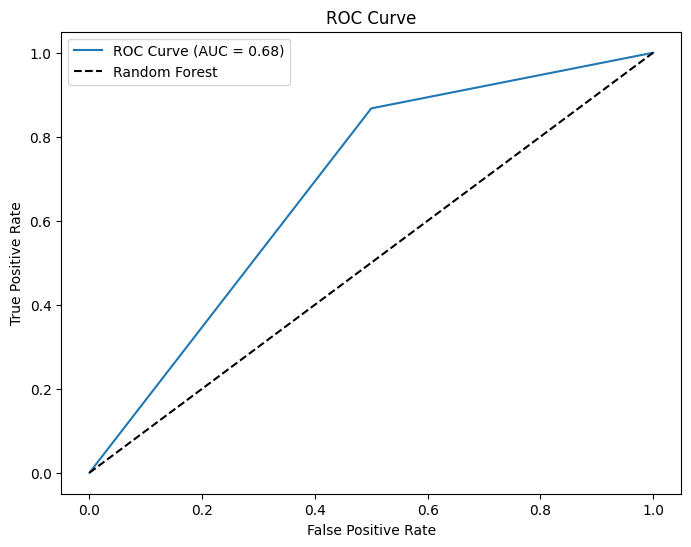

In [62]:
roc = roc_auc_score(y1_test, y1_pred)
print("ROC AUC Score:", roc)

plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y1_test, y1_pred)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

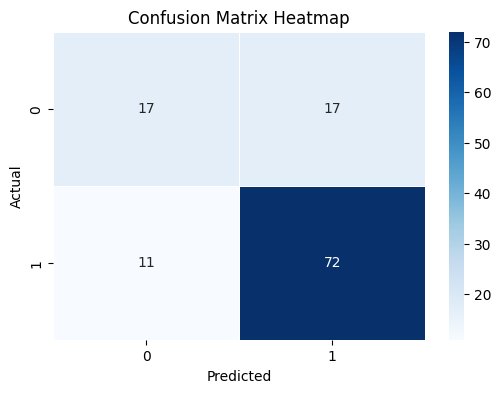

In [45]:
cm=confusion_matrix(y1_test,y1_pred)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [46]:
import joblib
joblib.dump(best_pipe2, 'best_pipe2.pkl')

['best_pipe2.pkl']

In [47]:
dfc3=df3.copy()
dfc3.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [48]:
dfc3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [49]:
dfc3.isnull().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


In [50]:
dfc3 = dfc3.drop('name', axis=1)
dfc3.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [51]:
x2 = dfc3.drop('status', axis=1)
y2 = dfc3['status']

from sklearn.model_selection import train_test_split

x2_train, x2_test, y2_train, y2_test = train_test_split(
    x2, y2,
    test_size=0.2,
    random_state=42,
    stratify=y2
)


In [52]:
models3 = {
    "Logistic Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(max_iter=2000))
    ]),

    "SVM": Pipeline([
        ('scaler', StandardScaler()),
        ('model', SVC(kernel='rbf', probability=True))
    ]),

    "KNN": Pipeline([
        ('scaler', StandardScaler()),
        ('model', KNeighborsClassifier())
    ]),

    "Decision Tree": DecisionTreeClassifier(),

    "Random Forest": RandomForestClassifier(random_state=42),

    "Gradient Boosting": GradientBoostingClassifier()
}


In [53]:
results3 = {}

for name, model in models3.items():
    model.fit(x2_train, y2_train)
    preds = model.predict(x2_test)
    acc = accuracy_score(y2_test, preds)
    results3[name] = acc

results3


{'Logistic Regression': 0.9230769230769231,
 'SVM': 0.9230769230769231,
 'KNN': 0.9230769230769231,
 'Decision Tree': 0.8461538461538461,
 'Random Forest': 0.9230769230769231,
 'Gradient Boosting': 0.8974358974358975}

In [54]:
best_pipe3 = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=2000, random_state=42))
])

best_pipe3.fit(x2_train, y2_train)

best_pipe3.score(x2_test, y2_test)


0.9230769230769231

In [55]:
y2_pred = best_pipe3.predict(x2_test)

print("Test Accuracy:", accuracy_score(y2_test, y2_pred))
print(classification_report(y2_test, y2_pred))
print(confusion_matrix(y2_test, y2_pred))


Test Accuracy: 0.9230769230769231
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39

[[ 8  2]
 [ 1 28]]


<Axes: >

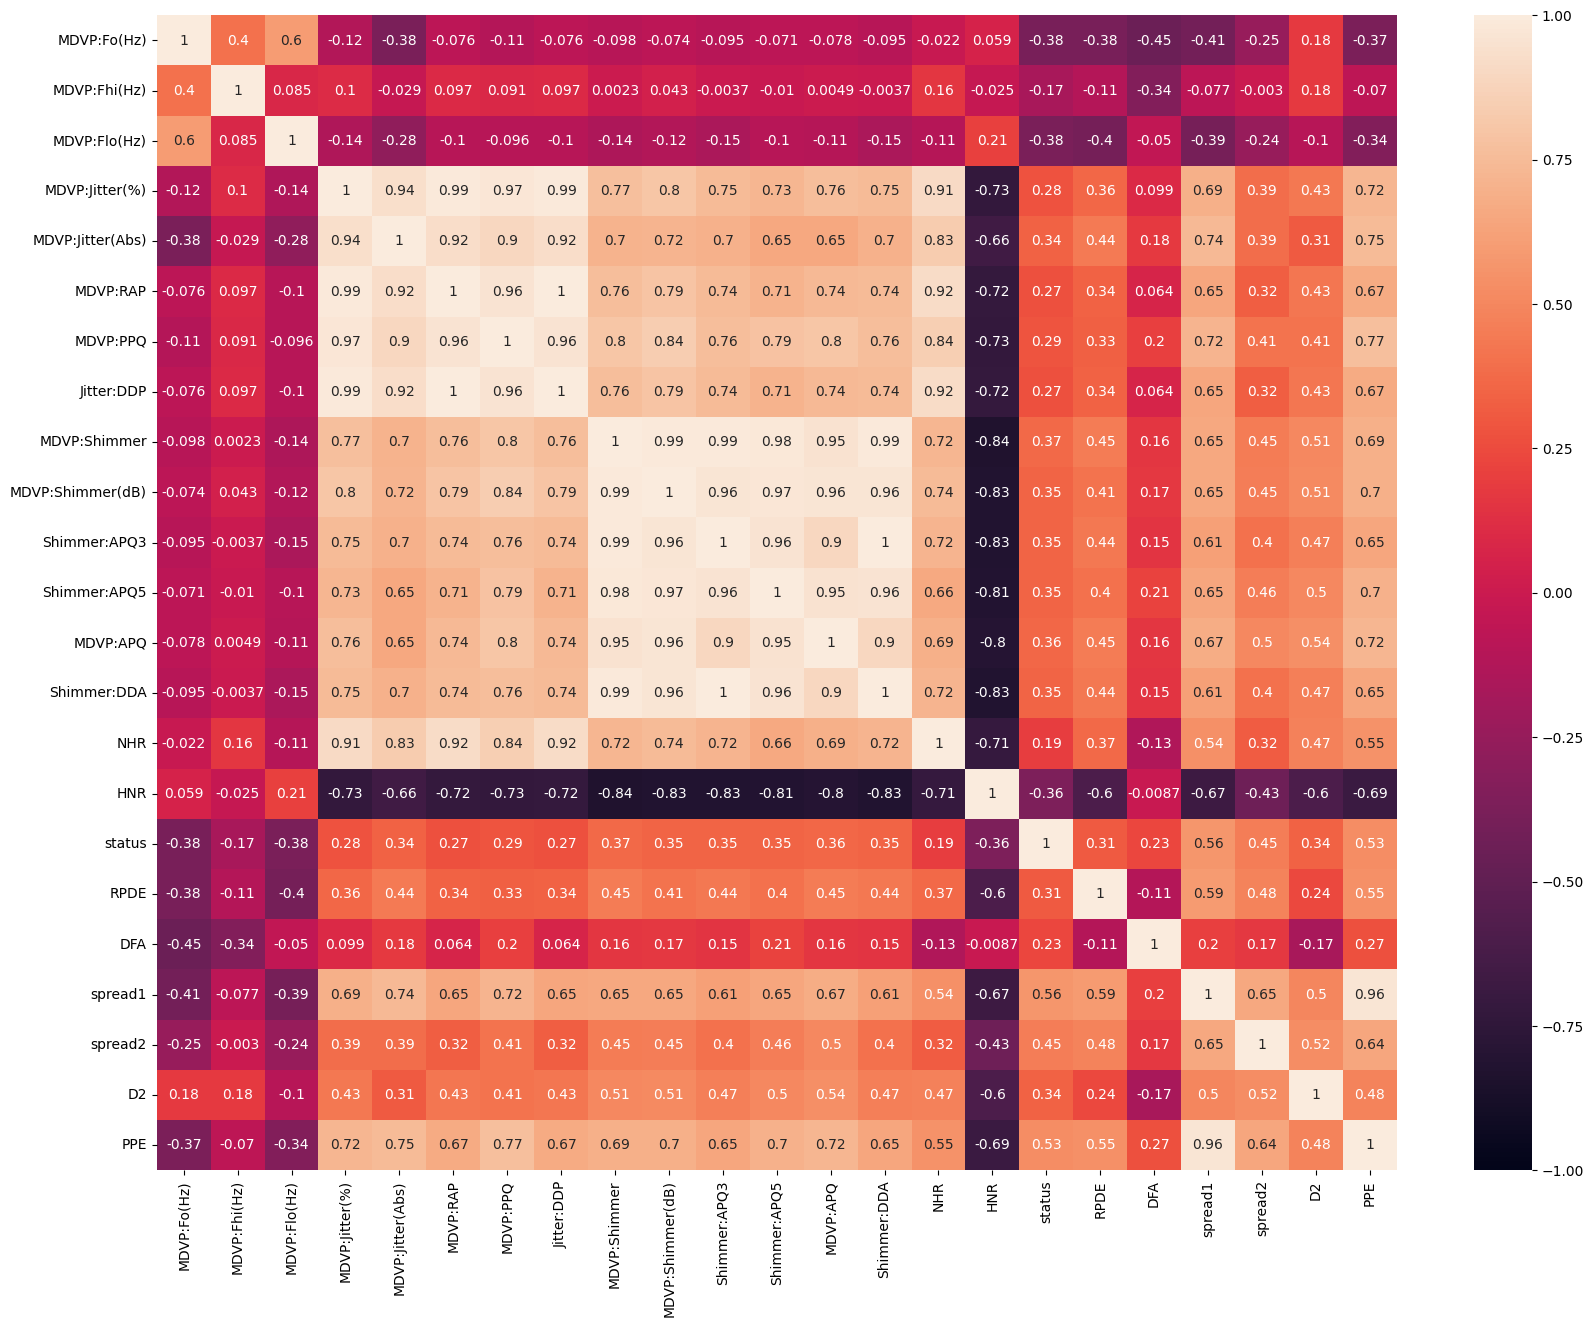

In [56]:
plt.figure(figsize=(20,15))
sns.heatmap(dfc3.corr(numeric_only=True), annot=True, vmin=-1, vmax=1)

In [57]:
mae2=mean_squared_error(y2_test,y2_pred),
rmse2=root_mean_squared_error(y2_test,y2_pred)
print("Mean squared error is : ", mae2)
print("Root mean squared error is :",rmse2)

Mean squared error is :  (0.07692307692307693,)
Root mean squared error is : 0.2773500981126146


ROC AUC Score: 0.8827586206896553


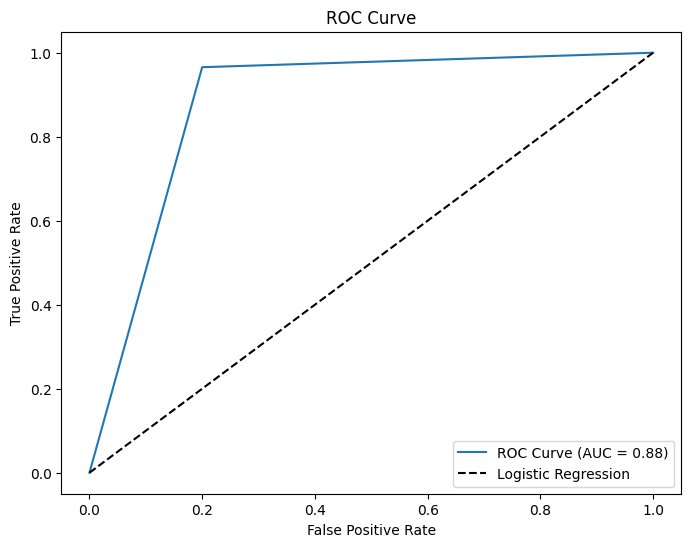

In [63]:
roc = roc_auc_score(y2_test, y2_pred)
print("ROC AUC Score:", roc)

plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y2_test, y2_pred)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

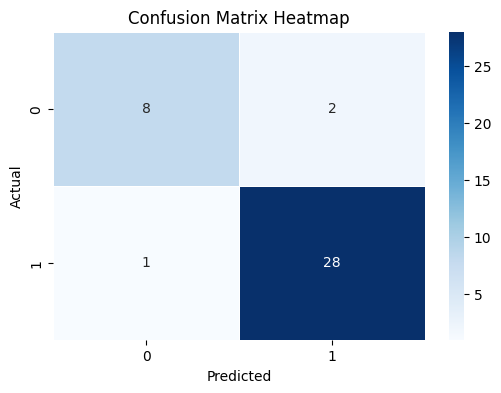

In [58]:
cm=confusion_matrix(y2_test,y2_pred)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [59]:
import joblib
joblib.dump(best_pipe3, 'best_pipe3.pkl')

['best_pipe3.pkl']